In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


vgsales = pd.read_csv("./vgsales.csv", index_col=0)
print('查看数据集信息:')
print(vgsales.info())
print('数据集的属性值如下：')
print(vgsales.columns.values)
print('数据集的前五列数据如下：')
vgsales.head()

查看数据集信息:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None
数据集的属性值如下：
['Name' 'Platform' 'Year' 'Genre' 'Publisher' 'NA_Sales' 'EU_Sales'
 'JP_Sales' 'Other_Sales' 'Global_Sales']
数据集的前五列数据如下：


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#数据集预处理
vgsales = vgsales.dropna(how='any')
print(vgsales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


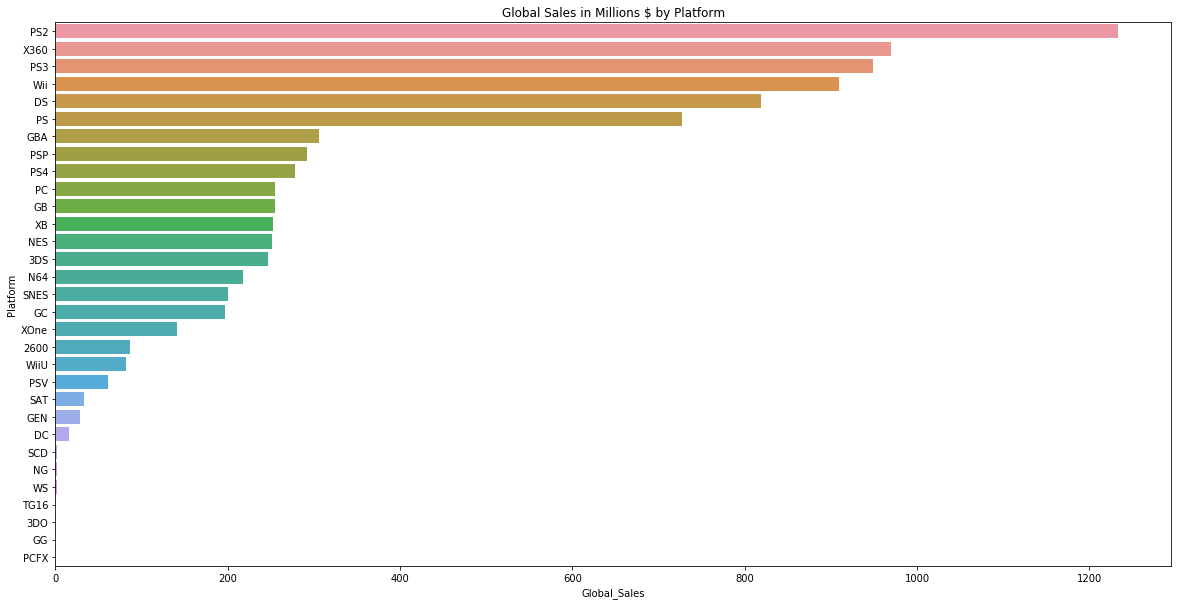

In [5]:
#各电子游戏平台销售额情况

plt.figure(figsize = (20,10))
sale_for_Platform = vgsales.groupby('Platform', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False)
sns.barplot(x = 'Global_Sales',
            y = 'Platform', data = sale_for_Platform)
plt.title('Global Sales in Millions $ by Platform')
plt.show()

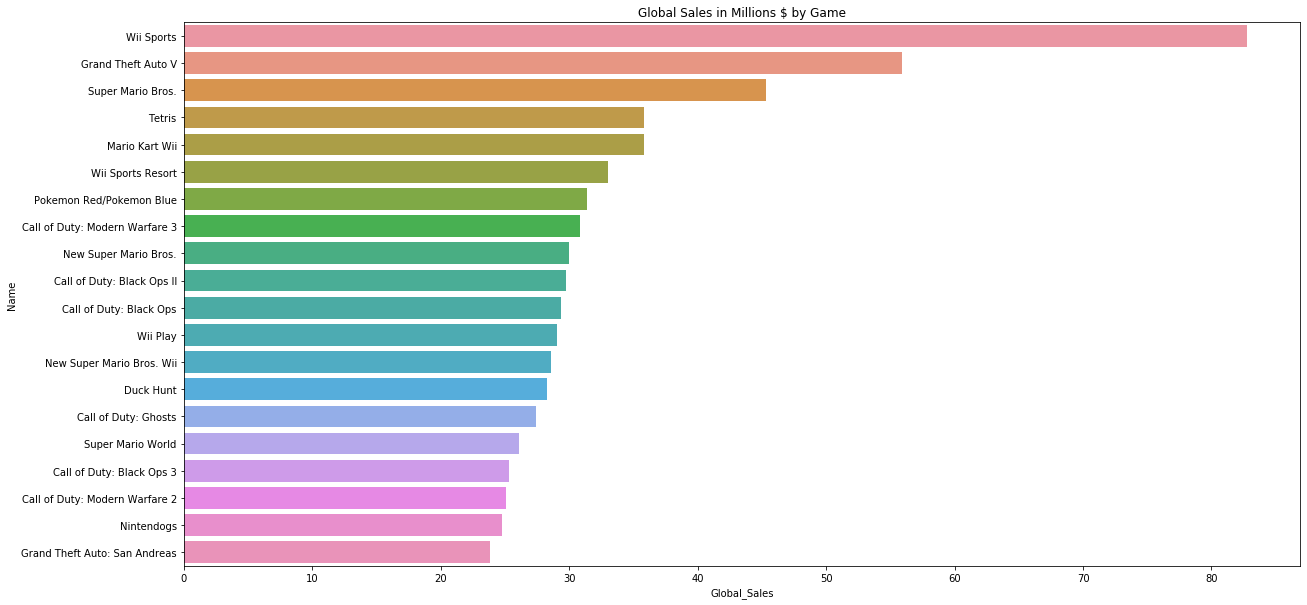

In [6]:
#各电子游戏销售额情况

plt.figure(figsize = (20,10))
sale_for_game = vgsales.groupby('Name', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False).head(20)
sns.barplot(x = 'Global_Sales',
            y = 'Name', data = sale_for_game)
plt.title('Global Sales in Millions $ by Game')
plt.show()

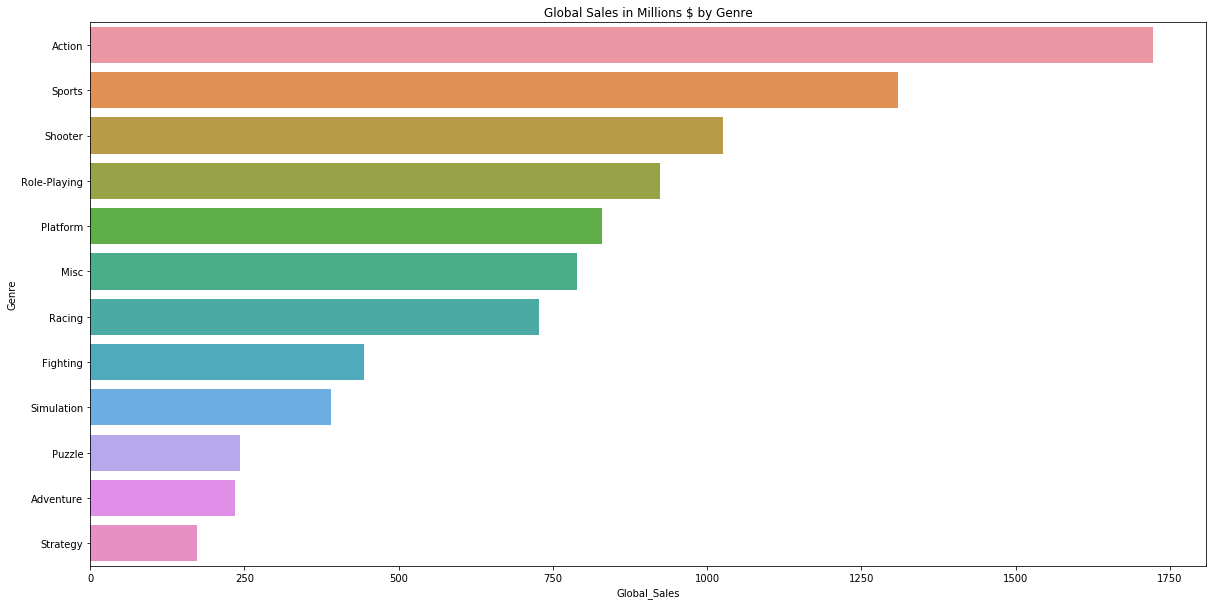

In [7]:
plt.figure(figsize = (20,10))
sale_for_Genre = vgsales.groupby('Genre', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False).head(20)
sns.barplot(x = 'Global_Sales', y = 'Genre', data = sale_for_Genre)
plt.title('Global Sales in Millions $ by Genre')
plt.show()

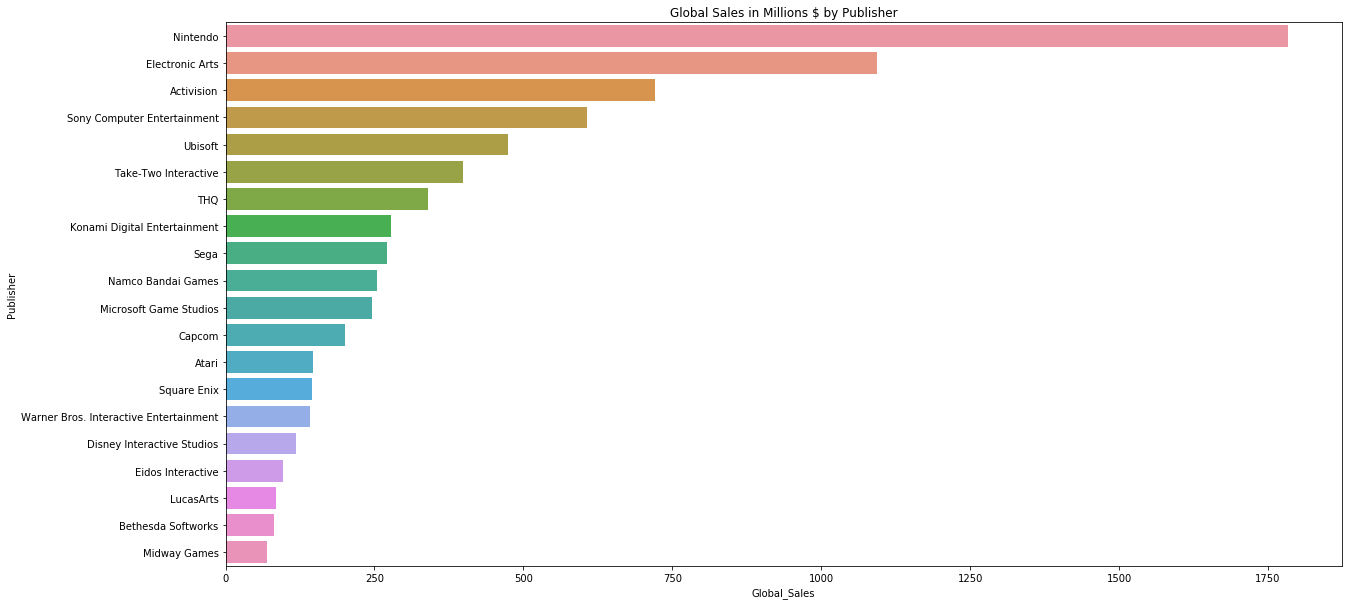

In [8]:
plt.figure(figsize = (20,10))
sale_for_Publisher = vgsales.groupby('Publisher', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False).head(20)
sns.barplot(x = 'Global_Sales', y = 'Publisher', data = sale_for_Publisher)
plt.title('Global Sales in Millions $ by Publisher')
plt.show()

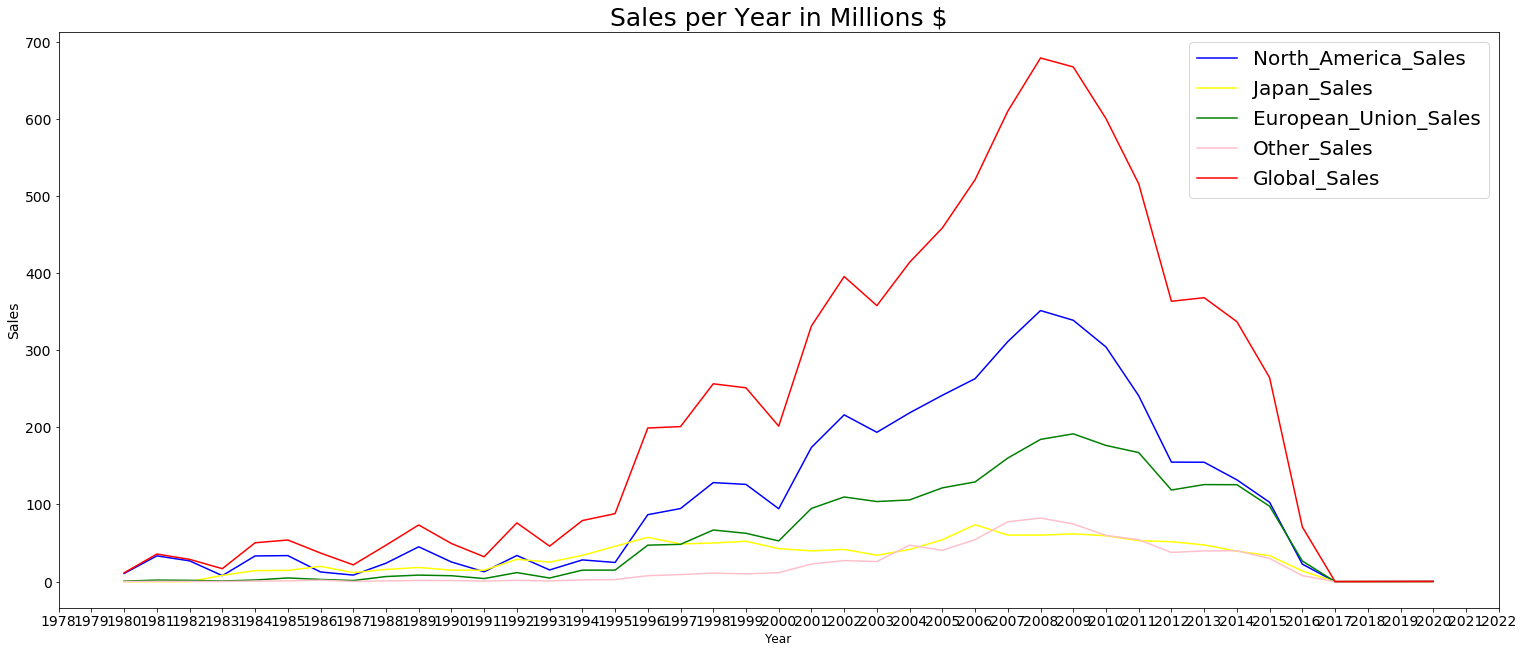

In [9]:
#每年电子游戏销售额情况
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

fig = plt.figure(figsize = (25,10))
ax = fig.add_axes([left, bottom, width, height])
sale_for_years = vgsales.groupby('Year', as_index = False).sum()

sns.lineplot(x = 'Year', y = 'NA_Sales', data = sale_for_years, color = 'blue', label = 'North_America_Sales', ax = ax)
sns.lineplot(x = 'Year', y = 'JP_Sales', data = sale_for_years, color = 'yellow', label = 'Japan_Sales', ax = ax)
sns.lineplot(x = 'Year', y = 'EU_Sales', data = sale_for_years, color = 'green', label = 'European_Union_Sales', ax = ax)
sns.lineplot(x = 'Year', y = 'Other_Sales', data = sale_for_years, color = 'pink', label = 'Other_Sales', ax = ax)
sns.lineplot(x = 'Year', y = 'Global_Sales', data = sale_for_years, color = 'red', label = 'Global_Sales', ax = ax)


ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Sales', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title('Sales per Year in Millions $', fontsize = 25)
plt.legend(fontsize = 20)
plt.show()

In [10]:
#通过北美洲的销售额来预测全球的销售额

vgsales = vgsales[vgsales['Year'] <= 2016.0]
sale_for_years = vgsales.groupby('Year', as_index = False).sum()
print(sale_for_years.info())
x = sale_for_years['NA_Sales'].values.reshape(-1, 1)
y = sale_for_years['Global_Sales']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

LR = LinearRegression()
LR.fit(X_train, y_train)
LR_score_train = LR.score(X_train, y_train)
print('LR Training score: ',LR_score_train)
LR_score_test = LR.score(X_test, y_test)
print('LR Testing score: ',LR_score_test)

svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
svr_score_train = svr.score(X_train, y_train)
print('svr Training score: ', svr_score_train)
svr_score_test = svr.score(X_test, y_test)
print('svr Testing score: ', svr_score_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          37 non-null     float64
 1   NA_Sales      37 non-null     float64
 2   EU_Sales      37 non-null     float64
 3   JP_Sales      37 non-null     float64
 4   Other_Sales   37 non-null     float64
 5   Global_Sales  37 non-null     float64
dtypes: float64(6)
memory usage: 2.0 KB
None
LR Training score:  0.982409910744848
LR Testing score:  0.981674385673199
svr Training score:  0.6615530451398045
svr Testing score:  0.7293015103406265
